In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
emotion = pd.read_csv('combined_emotion.csv')

In [3]:
emotion.head()

sentence emotion
0      i just feel really helpless and heavy hearted    fear
1  ive enjoyed being able to slouch about relax a...     sad
2  i gave up my internship with the dmrg and am f...    fear
3                         i dont know i feel so lost     sad
4  i am a kindergarten teacher and i am thoroughl...    fear

In [5]:
print(emotion.shape)

(422746, 2)


In [6]:
print('Emotions are: ', emotion['emotion'].unique())

Emotions are:  ['fear' 'sad' 'love' 'joy' 'suprise' 'anger']


In [7]:
emotion.isnull().sum()

sentence    0
emotion     0
dtype: int64

In [8]:
print(emotion.duplicated().sum())

6623


In [9]:
emotion.drop_duplicates(inplace = True)
print(emotion.duplicated().sum())

0


In [10]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
emotion['emotion'].value_counts()

emotion
joy        140779
sad        120989
anger       57235
fear        47664
love        34497
suprise     14959
Name: count, dtype: int64

In [12]:

plot_title = f"Emotions found"
fig = px.histogram( x=emotion['emotion'], template="plotly_dark",
                   title=plot_title)
fig.update_traces(marker_color = ['salmon', 'burlywood', 'fuchsia', 'forestgreen',
                                  'purple', 'sienna'], marker_line_width = 1,
                 marker_line_color = 'darkslategrey')
fig.update_xaxes(title = 'Emotions')
fig.update_layout(showlegend=False)
fig.show()

In [13]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import spacy


In [16]:
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shamimkhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
def remove_html(text):
  bs = BeautifulSoup(text, 'html.parser')
  return ' ' + bs.get_text() + ' '

def keep_only_letters(text):
  text = re.sub(r'[^a-zA-Z\s]', ' ', text)
  return text

def convert_to_lowercase(text):
  return text.lower()

def clean_reviews(text):
  text = remove_html(text)
  text = keep_only_letters(text)
  text = convert_to_lowercase(text)
  return text


emotion['sentence'] = emotion['sentence'].apply(clean_reviews)

In [18]:
english_stop_words = nltk.corpus.stopwords.words('english')

print(f"Total number of English stopwords: {len(english_stop_words)}")
print("\nFirst 20 stopwords:")
print(english_stop_words[:20])

Total number of English stopwords: 198

First 20 stopwords:
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


In [19]:
def remove_stop_words(text):
  for stopword in english_stop_words:
    stopword = ' ' + stopword + ' '
    text = text.replace(stopword, ' ')
    return text

emotion['sentence'] = emotion['sentence'].apply(remove_stop_words)

In [20]:
def text_stemming(text):
  stemmer = nltk.porter.PorterStemmer()
  stemmed = ' '.join([stemmer.stem(token) for token in text.split()])
  return stemmed

emotion['sentence'] = emotion['sentence'].apply(text_stemming)

In [21]:
emotion_train = emotion[:40000]
emotion_test = emotion[40000:]

vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(use_idf = True, ngram_range=(1,1))
tfidf_features_train = vectorizer.fit_transform(emotion['sentence'])
tfidf_features_test = vectorizer.transform(emotion['sentence'])
print(tfidf_features_train.shape, tfidf_features_test.shape)

(416123, 51907) (416123, 51907)


In [22]:
emotion_sentences = emotion.iloc[:, 0]
emotion_labels = emotion.iloc[:, 1]

print(len(emotion_sentences), len(emotion_labels))

416123 416123


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
svm = LinearSVC( random_state=42)
svm.fit(tfidf_features_train, emotion_labels)
y_pred_svm = svm.predict(tfidf_features_test)
acc_svm = accuracy_score(emotion_labels, y_pred_svm)
print(classification_report(emotion_labels, y_pred_svm))
print(confusion_matrix(emotion_labels, y_pred_svm))
print(f'SVM accuracy: {acc_svm:.2f}')

              precision    recall  f1-score   support

       anger       0.91      0.91      0.91     57235
        fear       0.87      0.87      0.87     47664
         joy       0.92      0.93      0.92    140779
        love       0.83      0.75      0.78     34497
         sad       0.94      0.94      0.94    120989
     suprise       0.78      0.79      0.79     14959

    accuracy                           0.90    416123
   macro avg       0.87      0.87      0.87    416123
weighted avg       0.90      0.90      0.90    416123

[[ 52250   1513    935    146   2313     78]
 [  1432  41552    885    114   1909   1772]
 [   949    924 130672   4759   2338   1137]
 [   320    264   7194  25702    918     99]
 [  2629   1965   1931    355 113842    267]
 [   109   1806    794     55    329  11866]]
SVM accuracy: 0.90


In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

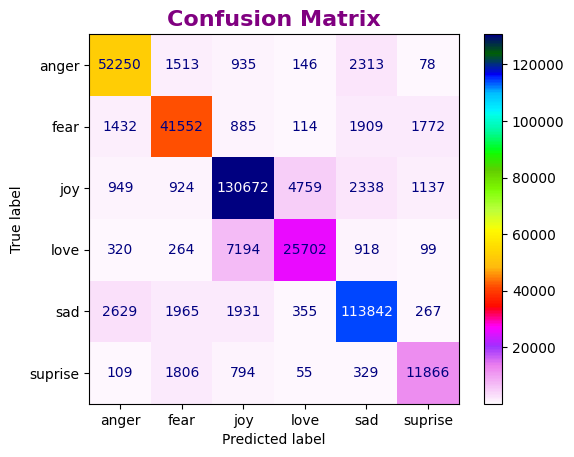

In [26]:
display = ConfusionMatrixDisplay.from_predictions(emotion_labels, y_pred_svm, 
                                                 cmap = 'gist_ncar_r')
plt.title('Confusion Matrix', color = 'purple', fontsize = 16, fontweight = 'bold')
plt.show()

In [27]:
try:
    # Check if the model and vectorizer exist and have been trained
    model_features = getattr(svm, 'n_features_in_', None)
    vectorizer_features = len(vectorizer.get_feature_names_out())
    
    if model_features and vectorizer_features:
        print("✅ Success! Your model and vectorizer are trained and ready in memory.")
        print(f"   - Your SVM model is expecting {model_features} features.")
        print(f"   - Your Vectorizer has a vocabulary of {vectorizer_features} words.")
    else:
        print("❓ The variables exist, but they don't appear to be trained. Please re-run your training cell.")

except NameError:
    print("❌ Error: The 'svm' and 'vectorizer' variables were not found in your notebook's memory.")
    print("   This means the model is not trained in the current session.")
    print("   Please run the training code first.")

✅ Success! Your model and vectorizer are trained and ready in memory.
   - Your SVM model is expecting 51907 features.
   - Your Vectorizer has a vocabulary of 51907 words.
